In [1]:
from tensorflow import keras
import datetime
import os

In [16]:
model = keras.models.Sequential([
    keras.layers.Conv2D( 16, (3,3), activation = 'relu', input_shape = (150,150,3)),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)        36928     
__________

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
Training_path = './horse-or-human/'

In [7]:
Testing_path = './validation-horse-or-human'

In [8]:
Training_image = ImageDataGenerator( 
    rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

In [9]:
Validation_image = ImageDataGenerator(rescale = 1/255)

In [18]:
Training = Training_image.flow_from_directory( 
    Training_path,
    target_size =  (150,150),
    batch_size = 128,
    class_mode= 'binary'
)

Found 1027 images belonging to 2 classes.


In [19]:
Validation = Validation_image.flow_from_directory(
    Testing_path,
    target_size = (150,150),
    batch_size = 32,
    class_mode= 'binary'
)

Found 256 images belonging to 2 classes.


In [12]:
from tensorflow.keras.optimizers import RMSprop

In [21]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [ ]:
logdir = os.path.join("logs2", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [22]:
history = model.fit(
    Training,
    epochs = 100, 
    steps_per_epoch= 8,
    validation_data= Validation,
    verbose= 1,
    validation_steps= 8,
    callbacks=[tensorboard_callback]
)

Epoch 1/100
8/8 [==============================] - 11s 1s/step - loss: 0.6875 - acc: 0.5493 - val_loss: 0.6778 - val_acc: 0.5156
Epoch 2/100
8/8 [==============================] - 11s 1s/step - loss: 0.6507 - acc: 0.6465 - val_loss: 0.7558 - val_acc: 0.5000
Epoch 3/100
8/8 [==============================] - 8s 987ms/step - loss: 0.6432 - acc: 0.6477 - val_loss: 0.7049 - val_acc: 0.5273
Epoch 4/100
8/8 [==============================] - 11s 1s/step - loss: 0.5993 - acc: 0.7129 - val_loss: 0.5733 - val_acc: 0.7109
Epoch 5/100
8/8 [==============================] - 9s 1s/step - loss: 0.5729 - acc: 0.7572 - val_loss: 0.9497 - val_acc: 0.5078
Epoch 6/100
8/8 [==============================] - 11s 1s/step - loss: 0.5455 - acc: 0.7461 - val_loss: 0.8224 - val_acc: 0.5391
Epoch 7/100
8/8 [==============================] - 10s 1s/step - loss: 0.5991 - acc: 0.7382 - val_loss: 0.5821 - val_acc: 0.6758
Epoch 8/100
8/8 [==============================] - 10s 1s/step - loss: 0.5572 - acc: 0.7377 - va

8/8 [==============================] - 10s 1s/step - loss: 0.2590 - acc: 0.8949 - val_loss: 1.3941 - val_acc: 0.6836
Epoch 65/100
8/8 [==============================] - 11s 1s/step - loss: 0.2712 - acc: 0.8919 - val_loss: 2.0933 - val_acc: 0.6055
Epoch 66/100
8/8 [==============================] - 13s 2s/step - loss: 0.2508 - acc: 0.9023 - val_loss: 1.9850 - val_acc: 0.6094
Epoch 67/100
8/8 [==============================] - 11s 1s/step - loss: 0.3439 - acc: 0.8770 - val_loss: 1.5924 - val_acc: 0.6641
Epoch 68/100
8/8 [==============================] - 9s 1s/step - loss: 0.4141 - acc: 0.8194 - val_loss: 1.8942 - val_acc: 0.6094
Epoch 69/100
8/8 [==============================] - 12s 1s/step - loss: 0.2178 - acc: 0.9189 - val_loss: 2.2133 - val_acc: 0.5898
Epoch 70/100
8/8 [==============================] - 11s 1s/step - loss: 0.2326 - acc: 0.9068 - val_loss: 2.6377 - val_acc: 0.5547
Epoch 71/100
8/8 [==============================] - 11s 1s/step - loss: 0.2803 - acc: 0.8607 - val_loss:

In [23]:
accuracy = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epocs = range(len(accuracy))

In [24]:
from matplotlib import pyplot as plt

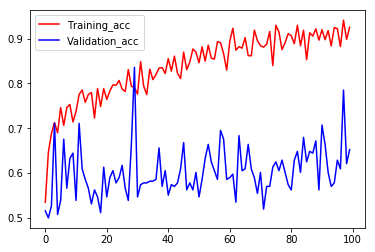

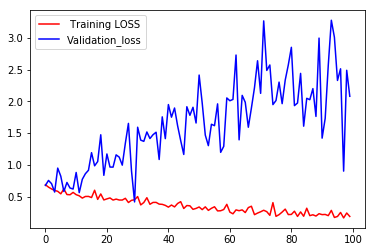

In [25]:
plt.plot( epocs, accuracy, 'r', label = 'Training_acc')
plt.plot(epocs, val_acc, 'b', label = 'Validation_acc')
plt.legend(loc="best")
plt.figure()
plt.plot( epocs, loss, 'r', label = ' Training LOSS')
plt.plot( epocs, val_loss, 'b', label = 'Validation_loss')
plt.legend(loc="best")
plt.show()

I dont know what the hell is going on here the validation accuracry is not increasing een after using augmentation  and the validation loss is like woow wooww

